In [1]:
from mpmath import *
from IGQG import *
from numpy import array,concatenate,zeros

from matplotlib import pyplot as plt

This notebook calculates the dimensionless quantities $\bar{R}_f$ and $\bar{R}_b$ which related to the curvature for fermions and bosons acording to equations (34) and (43) in the manuscript, respectively.

In [2]:
half = power(2,-1)

Fermions


In [3]:
x = arange(.01,1,.01)

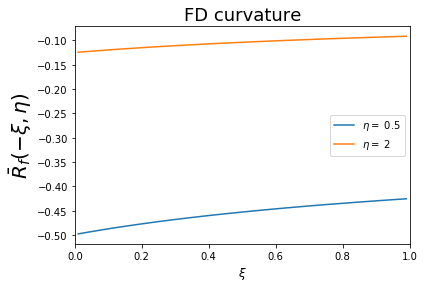

In [4]:
etaarray = [half,2]
fig, ax = plt.subplots()

for etaa in etaarray:
    a = array([A(etaa,-xx) for xx in x])
    b = array([B(etaa,-xx) for xx in x])
    y = fermi_Curvature(a,b)
    line1, = ax.plot(x, y, label=('$\eta =$ {}'.format(etaa)))


ax.set_xlim(0,1)

ax.set_xlabel(r'$\xi$', fontsize=12)
ax.set_ylabel(r'$\bar{R}_f (-\xi,\eta)}$', fontsize=20)
ax.set_title(r'FD curvature', fontsize=18)
ax.legend()

plt.savefig('BoA2fermions.png', bbox_inches = "tight", dpi=600)
plt.show()

Bosons

In [5]:
eta = half
x=concatenate([arange(.9,.99,.001),arange(.99,.9999,.0002),array([1-1e-8])])
betas = [.005,.01,.015,.02]
ylim=0,6

In [6]:
#eta = 2
#betas = [.075,.1,.125,.15]
#x=concatenate([arange(.9,.99,.001),arange(.99,.9999,.0002),arange(.9999,1,.00001),array([1-1e-8])])
#ylim=0,8.5

In [7]:
aarray = array([A(eta,xx) for xx in x])
barray = array([B(eta,xx) for xx in x])

acarray = array([Ac(eta,xx) for xx in x])
bcarray = array([Bc(eta,xx) for xx in x])

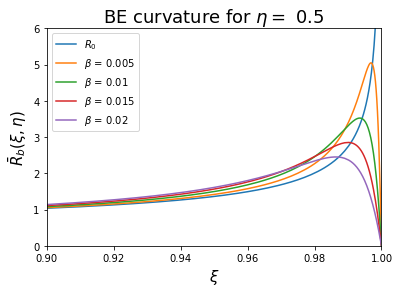

In [8]:
y = bose_Curvature(aarray,zeros(aarray.shape),barray,zeros(barray.shape),1,eta)

fig, ax = plt.subplots()
line1, = ax.plot(x, y, label='$R_0$')

for beta in betas:
    R = bose_Curvature(aarray,acarray,barray,bcarray,beta,eta)
    line1, = ax.plot(x, R,label=(r"$\beta$ = {}".format(beta)))

ax.set_ylim(ylim)
ax.set_xlim(.9,1)


ax.set_xlabel(r'$\xi$', fontsize=15)
ax.set_ylabel(r'$\bar{R}_b(\xi,\eta)$', fontsize=15)
ax.set_title(r'BE curvature'+' for $\eta=$ {}'.format(eta), fontsize=18)
ax.legend()

plt.savefig('RoAbosons-eta{}.png'.format(eta), bbox_inches = "tight",dpi=600)
plt.show()